In [2]:
import numpy as np 
import pickle as pkl 
import matplotlib.pyplot as plt
import sys
import pandas as pd
from itertools import product
from scipy.signal import savgol_filter, find_peaks
from scipy import signal
import numpy as np 
import numpy.ma as ma
import pandas as pd
import pickle as pkl 
import matplotlib.pyplot as plt 
import cv2
from moviepy.editor import *
from scipy import signal 

from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import joblib
from scipy.interpolate import interp1d
from os.path import exists 
from scipy.fft import fft
from scipy import stats

from scipy.interpolate import interp1d
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.fft import fft
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import itertools
from itertools import product
from joblib import Parallel, delayed 
from scipy.signal import savgol_filter, find_peaks
from scipy import signal
from os.path import exists 
import random



import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly
from scipy import stats
import plotly.express as px


import torch
from torch import nn
from torch.nn import functional as F


import sys


#filenamestart = "/Volumes/T7/pilotingdataset/"
#outputfilenamestart = '/Volumes/T7/datalabeling/'


ModuleNotFoundError: No module named 'cv2'

In [3]:
#Binary Classification, both sensors, labels and preds  
data = pd.read_pickle("/Users/akhil/Documents/Wearable_Scratch_Intensity/final_code/data/bc_labelpreds.pickle")
labels = data['labels']
preds = data['predictions']
cats = data['cat_labels']
print(data.keys())

all_labels = []
all_preds = []
all_cat_labels = []
num_labels = []
accs = []
for p in np.arange(0,20):
    l = labels[p]
    pr = np.round(preds[p])
    c = cats[p]
    a = np.sum(pr==l)/np.shape(l)[0]
    accs.append(a)
    num_labels.append(np.shape(l)[0])
    all_labels.extend(l)
    all_preds.extend(pr)
    all_cat_labels.extend(c)

#print("All Errors:", errors)
mean_acc = np.mean(accs)
std = np.std(accs)

print("Binary Classification, Both Sensors")
print("Mean Accuracy:", np.round(mean_acc, 3), "STD:", np.round(std,3))

total_number_labels = np.sum(num_labels)
average_number_labels = np.mean(num_labels)
std_number_labels = np.std(num_labels)

print()
print("Total Number of Data:", total_number_labels)
print("Average Number of Data per Participant:", np.round(average_number_labels,2))
print("Standard Deviation of Data per Participant:",  np.round(std_number_labels,2))





dict_keys(['labels', 'predictions', 'cat_labels'])
Binary Classification, Both Sensors
Mean Accuracy: 0.9 STD: 0.056

Total Number of Data: 32760
Average Number of Data per Participant: 1638.0
Standard Deviation of Data per Participant: 0.0


In [4]:
interaction_accs = []
interactions = np.arange(1, 15)
i1 = ['hand waving', 'keyboard typing', 'texting','writing', 'tapping', 
      'air scratch', 'clapping']
i2 = ['top of hand','forearm/wrist','inside elbow', 
    'neck', 'head', 'behind knees', 'ankles']

all_interaction_accs = []
for i in interactions:
    p_interaction_accs = []
    for p in np.arange(0,20):
        l = labels[p]
        pr = np.round(preds[p])
        c = cats[p]
        inds = (np.array(c) == i)
        l_int = np.array(l)[inds] #only take the inds where they are doing the specific interaction
        pr_int = np.array(pr)[inds]
        acc = np.sum(l_int==pr_int)/np.shape(l_int)[0]
        p_interaction_accs.append(acc)
    all_interaction_accs.append(p_interaction_accs)
        

interaction_accs = np.mean(all_interaction_accs, axis = 1)
interaction_stds = np.std(all_interaction_accs, axis = 1)




In [5]:
#in plotly 

cols = plotly.colors.DEFAULT_PLOTLY_COLORS

fig = make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], shared_yaxes=True, subplot_titles=("Non-Scratching", "Scratching"))

#x = ['Task 1, Cup (Web)', 'Task 1, Cup (Hat)','Task 2, Trash', 'Task 3, Blanket', 'Task 4, Cleaning']
x = ['hand waving', 'keyboard typing', 'texting','writing', 'tapping', 
      'air scratching', 'clapping', 'top of hand','forearm/wrist','inside elbow', 
    'neck', 'head', 'behind knees', 'ankles']
xa = x[0:7]
xb = x[7:]

ya = interaction_accs[0:7]*100
yb = interaction_accs[7:]*100

fig.add_trace(go.Bar(x = xa, y = ya, text= np.round(ya,0), textposition='auto', marker=dict(color=cols[0])), row = 1, col =1)
fig.add_trace(go.Bar(x = xb, y = yb,text= np.round(yb,0), textposition='auto', marker=dict(color=cols[1])), row = 1, col =2)

fig.update_layout(showlegend = False,
    title={
        'text': "<b>Classification Accuracy per Interaction</b>",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width = 800, height = 500, yaxis_title = 'Accuracy (%)',
        font=dict(
            size=15,
        )
                     )
fig.update_layout(
    font_family="Helvetica Neue",
    font_color="black",
    title_font_family="Helvetica Neue",
    title_font_color="black",
    legend_title_font_color="black",
    font=dict(
        size=16,
    )
)

fig.update_yaxes(visible = True, range = [0, 102]) 
fig.show()
fig.write_image('/Users/akhil/Documents/Wearable_Scratch_Intensity/final_paper/final_figures/acc_per_interaction.png')




NameError: name 'plotly' is not defined

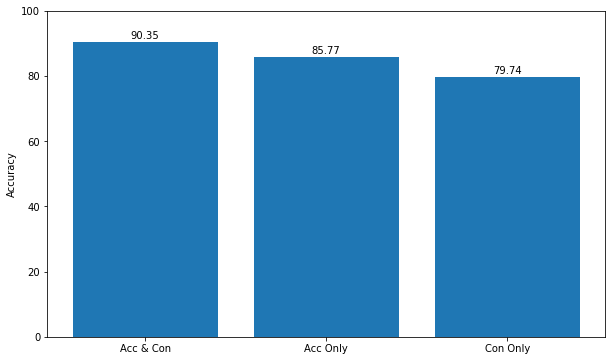

In [9]:
#Binary Classification Ablation Results
xtick = ['Acc & Con', 'Acc Only', 'Con Only']
means = [90.35, 85.77, 79.74] #TOOD: CHANGE
stds = [5.69, 4.34, 5.88] #TOOD: CHANGE

plt.rcParams["figure.figsize"] = (10,6)
bars = plt.bar(xtick, means)
#plt.errorbar(xtick, means,
#             yerr = stds,
#             fmt ='bo')

    
plt.ylabel("Accuracy")
plt.ylim([0,100])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2.5, yval + 1, round(yval,2))
    
plt.show()


In [10]:
import plotly.graph_objects as go
rowEvenColor = 'lightgrey'
rowOddColor = 'white'
col1 = ['Subject Condition', 'Number of Participants', 'Gender Ratio (M:F)', 'Age']
col2 = ['Healthy', 20, '3:1', '21-30 (24.15±2.52)']

fig = go.Figure(data=[go.Table(
    header = dict(values = ['', ''],line_color = 'darkslategrey', height = 0),
    columnwidth = [0.55,0.45],
    cells=dict(values=[col1, col2],
    line_color='darkslategray',
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*4],
    align = ['left', 'center'],
    height = 25,
    font = dict(color = 'black', size = 15)))
                     ])

fig.layout['template']['data']['table'][0]['header']['fill']['color']='rgba(0,0,0,0)' #remove header
#fig.for_each_trace(lambda t: t.update(header_fill_color = 'rgba(0,0,0,0)'))


fig.update_layout(showlegend = False,
    title={
        'text': "<b>Participant Demographics</b>",
        'y':0.8,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width = 550, height = 400,
        font=dict(
            size=15,
        )
                     )
fig.update_layout(
    font_family="Helvetica Neue",
    font_color="black",
    title_font_family="Helvetica Neue",
    title_font_color="black",
    legend_title_font_color="black"
)



fig.show()
fig.write_image('/Users/akhil/Documents/Wearable_Scratch_Intensity/final_paper/final_figures/demographics_table_study1.png')


In [11]:
import plotly.graph_objects as go
rowEvenColor = 'lightgrey'
rowOddColor = 'white'
col1 = ['Window Size', 'Stride', 'Number of Participants', 'Scratching data per participant',
       'Non-scratching data per participant', 'Total data in dataset']
col2 = ['1 second', '0.25 seconds', '20', '3.5 min, 819 samples', '3.5 min, 819 samples', '140 min, 32760 samples']

fig = go.Figure(data=[go.Table(
    header = dict(values = ['', ''],line_color = 'darkslategrey', height = 0),
    columnwidth = [0.55,0.45],
    cells=dict(values=[col1, col2],
    line_color='darkslategray',
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*4],
    align = ['left', 'center'],
    height = 25,
    font = dict(color = 'black', size = 15)))
                     ])

fig.layout['template']['data']['table'][0]['header']['fill']['color']='rgba(0,0,0,0)' #remove header
#fig.for_each_trace(lambda t: t.update(header_fill_color = 'rgba(0,0,0,0)'))


fig.update_layout(showlegend = False,
    title={
        'text': "<b>Binary Classification Dataset</b>",
        'y':0.83,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width = 650, height = 450,
        font=dict(
            size=14,
        )
                     )
fig.update_layout(
    font_family="Helvetica Neue",
    font_color="black",
    title_font_family="Helvetica Neue",
    title_font_color="black",
    legend_title_font_color="black"
)

fig.show()
fig.write_image('/Users/akhil/Documents/Wearable_Scratch_Intensity/final_paper/final_figures/bin_dataset.png')


In [13]:
import plotly.graph_objects as go
rowEvenColor = 'lightgrey'
rowOddColor = 'white'
col1 = ['Acc+Con', 'Acc Only', 'Con Only']
col2 = ['<b>89.98'  + ' ' + u"\u00B1" + ' ' + '5.63%', '86.24'  + ' ' + u"\u00B1" + ' ' + '4.59%', '79.98'  + ' ' + u"\u00B1" + ' ' + '5.82%']

fill_colors =['white', 'white', 'white']


fig = go.Figure(data=[go.Table(
    columnwidth = [0.3,0.7],
    header=dict(values=['<b>Model</b>', '<b>Classification Accuracy</b>'],
    fill_color='lightgrey',
    align = ['left', 'center'],
                line_color = 'darkslategray',
    font = dict(color = 'black', size = 17)),

    cells=dict(values=[col1, col2],
    #line_color='darkslategray',
    #fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor]*4],
    align = ['left', 'center'],
    fill_color= [fill_colors]*3,
    line_color = 'darkslategray',
    height = 30,
    font = dict(color = 'black', size = 16)))
                     ])

fig.layout['template']['data']['table'][0]['header']['fill']['color']='rgba(0,0,0,0)' #remove header
#fig.for_each_trace(lambda t: t.update(header_fill_color = 'rgba(0,0,0,0)'))


fig.update_layout(showlegend = False,
    title={
        'text': "<b>Model Performance and Ablation Study</b>",
        'y':0.77,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, width = 550, height = 350,
        font=dict(
            size=14,
        )
                     )
fig.update_layout(
    font_family="Helvetica Neue",
    font_color="black",
    title_font_family="Helvetica Neue",
    title_font_color="black",
    legend_title_font_color="black"
)

fig.show()
fig.write_image('/Users/akhil/Documents/Wearable_Scratch_Intensity/final_paper/final_figures/bin_ablation.png')
